# Table of Contents
 <p><div class="lev2 toc-item"><a href="#Non-Contiguous-Cartograms-using-GeoPandas" data-toc-modified-id="Non-Contiguous-Cartograms-using-GeoPandas"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Non-Contiguous Cartograms using GeoPandas</a></div><div class="lev1 toc-item"><a href="#Usage" data-toc-modified-id="Usage-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Usage</a></div><div class="lev1 toc-item"><a href="#Notes" data-toc-modified-id="Notes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Notes</a></div><div class="lev1 toc-item"><a href="#References" data-toc-modified-id="References-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>References</a></div><a href="#Examples" data-toc-modified-id="Examples-3"><span class="toc-item-num">4&nbsp;&nbsp;</span>Examples</a></div>

# Non-Contiguous Cartograms using GeoPandas
## Usage

The basic function accepts a GeoPandas GeoDataFrame and the column name of the field for which you want to create a non-contiguous cartogram.

By default, the function scales all geometries relative to the most dense geometry (value_field/area). However, when the most dense geometry is particularly small it can make other geometries extremely small too. To deal with this, you can either: specify that the scaling using a different 'anchor' by rank (i.e. change anchor_rank to 2 for 2nd most dense geometry); or, scale according to the density of a particular row in id_field using anchor_id. Using higher ranks, or particular rows to scale increases the chances of overlapping geometries.

As the output is a GeoPandas GeoDataFrame, plotting is straigthforward using the built-in .plot() method. The original geometries cab be used as a base map with the non-contiguous cartogram overlaid.

NB The field used for creating the non-contiguous cartogram should contain values which are positive and greater than zero. It is important that the input data be in a projected (Cartesian) coordinate system. The GeoDataFrame should be structured so that 1 row is 1 record.

## Notes

This simple method involves increasing or decreasing the relative size of each areal unit dependent on the original size of the unit and the value of the variable of interest. The original article constructs this cartogram using a projector method and a computer method. The projector method involves scaling and projecting an image for manual tracing. We implement the computer method.

This method works best for sets of polygons of similar size, but with different populations, or for areas of different sizes but with populations that are broadly proportional to size. The computer method isn't great when the areal unit of highest density, used as the basis for computing the scale of all other areal unit, is very small. Olson's projector method allows researchers to select an appropriate areal unit of high, but not necessarily the highest, density.

Olson gives the following reasons for the usefulness of non-contiguous cartograms:

1. They are straightforward to produce.
2. The empty area between areal units is meaningful, reflecting the degree of discrepency between the density in the most crowded areal unit and the density in other units.
3. The representation is of the actual areal units for which the information was compiled, meaning they are generally more recognisable than contiguous cartograms that distort areal units.

## References

Judy M. Olson (1976) Noncontiguous Area Cartograms, The Professional Geographer, 28:4, 371-380.

## Examples

In [1]:
# Some required libraries.
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# import thenon-contiguous cartogram function
from cartogrampy.noncontiguous_cartogram import noncontiguous_cartogram

%matplotlib inline

In [2]:
# Get some data for London
# Read in London Boroughs geojson and project to British National Grid.
ldn_boro = gpd.read_file('data/LDN_Boro.geojson').to_crs(epsg=27700)

# Get some population data for London Boroughs
ldn_pop = pd.read_excel('data/Pandas_Lon_Pop.xlsx')

# Merge the population data with the geospatial data
ldn_boro = ldn_boro.merge(ldn_pop, how='left', left_on='GSS_CODE', right_on='New Code')

In [3]:
# Create the non-contiguous cartogram
ldn_ncc = noncontiguous_cartogram(ldn_boro,2015)

(500648.73583364347,
 564876.96585052647,
 153596.64441368124,
 203188.05443627169)

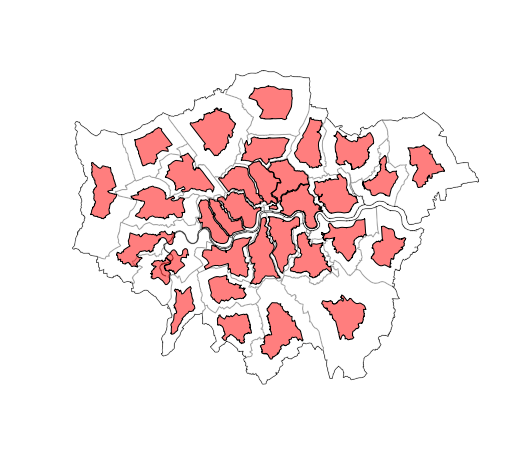

In [4]:
fig, ax = plt.subplots(1,figsize=(8,8))

# First plot the original boundaries for comparison
ldn_boro.plot(color='w',ax=ax,alpha = 0.8,zorder=0)

# Now plot the resized areas
ldn_ncc.plot(color='r',ax=ax)

ax.axis('equal')
ax.axis('off')
#plt.savefig('LDN_Non_Contig.png',dpi=300)

In [5]:
# Get some data for US States
usstate = gpd.read_file('data/US_State_2016_5m.geojson')

# Set crs
usstate.crs = {'init': u'epsg:4269'}

# Get continental US and project to NAD83 Contiguous US Albers.
usstate = usstate[~usstate['STUSPS'].isin(['AK', 'HI', 'AS', 'PR',
                                           'GU', 'MP', 'VI'])].to_crs({'init': 'epsg:5070'})
# Read in state populations
state_pop = pd.read_excel('data/Pandas_US_Pop.xlsx')

# Merge population data
usstate = usstate.merge(state_pop, how='left', left_on='STUSPS', right_on='Code')

In [6]:
# Create the non-contiguous cartogram
us_ncc_1 = noncontiguous_cartogram(usstate,2016)

(-2586829.438888689,
 2488915.8729062318,
 122867.38374577998,
 3317791.7556957928)

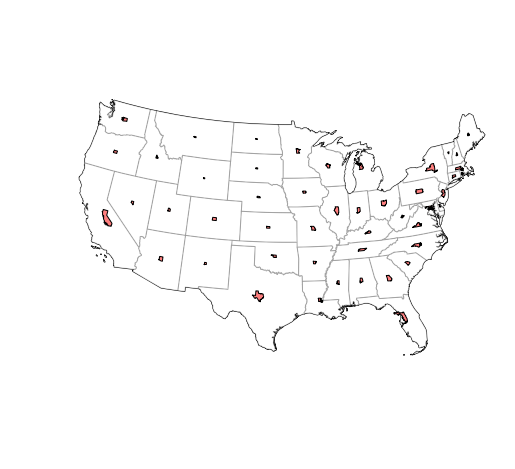

In [8]:
fig, ax = plt.subplots(1,figsize=(8,8))

# First plot the original boundaries for comparison
usstate.plot(color='w',ax=ax,alpha = 0.8,zorder=0)

# Now plot the resized areas
us_ncc_1.plot(color='r',ax=ax)

ax.axis('equal')
ax.axis('off')
#plt.savefig('US_Non_Contig.png',dpi=300)

In [35]:
# The most dense region is Washington D.C., so let's try a higher rank and a specific state!
# Create the non-contiguous cartogram
us_ncc_2 = noncontiguous_cartogram(usstate, 2016,anchor_rank=2)
us_ncc_CT = noncontiguous_cartogram(usstate, 2016, id_field = 'STUSPS',anchor_id='CT')

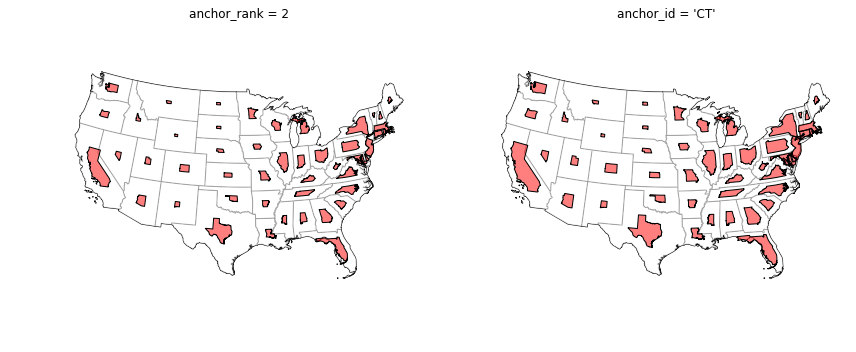

In [42]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))

# ax1
# Base map
usstate.plot(color='w',ax=ax1,alpha = 0.8,zorder=0)
# cartogram
us_ncc_2.plot(color='r',ax=ax1)
ax1.axis('equal')
ax1.axis('off')
ax1.set_title("anchor_rank = 2")

# ax2
# Base map
usstate.plot(color='w',ax=ax2,alpha = 0.8,zorder=0)
# cartogram
us_ncc_CT.plot(color='r',ax=ax2)
ax2.axis('equal')
ax2.axis('off')
ax2.set_title("anchor_id = 'CT'")

plt.tight_layout()
#plt.savefig('US_Non_Contig.png',dpi=300)